First let us put the data of our LP problem in numpy arrays.
Then we also include positivity constrainst.

In [1]:
import numpy as np
A = np.array([[1, 1.5],[2, 1]])
b = np.array([75,100])
c = np.array([5, 4])

Abig = np.block([[A],[-np.eye(2)]])
bbig = np.block([b, np.zeros(2)])
print(f"{Abig=} {bbig=}")

Abig=array([[ 1. ,  1.5],
       [ 2. ,  1. ],
       [-1. , -0. ],
       [-0. , -1. ]]) bbig=array([ 75., 100.,   0.,   0.])


In order to compute the vertices of the damissible domain, we first compute all points of intersection of two constraints among the five possible. So we want to use *combinations*. Fortunately, this exists in **itertools**.

In [2]:
import itertools
indices = itertools.combinations(range(4), 2)
for index in indices:
    print(f"{index=}")

index=(0, 1)
index=(0, 2)
index=(0, 3)
index=(1, 2)
index=(1, 3)
index=(2, 3)


Now we compute the points of interesection. Next, we have to check if they are **admissible**.

It is no extra work to make a list of the corresponding **active indices**. Then we can also construct the list of edges, which we need for plotting.

In [3]:
indices = itertools.combinations(range(4), 2)
vertices = []
actives = []
for index in indices:
    x = np.linalg.solve(Abig[index,:], bbig[list(index)])  #transform tuple to list, one-dim np.array doesn't like tuple for fancy indexing
    if np.all(bbig - Abig@x >= 0): 
        vertices.append(x)
        actives.append(index)
print(f"{vertices=}\n{actives=}")
edges = []
for i,active1 in enumerate(actives):
    s1 = set(active1)
    for j,active2 in enumerate(actives):
        if i>=j: continue
        s2 = set(active2)
        if len(s1.intersection(s2)) == 1:
            edges.append((i,j))
print(f"{edges=}")

vertices=[array([37.5, 25. ]), array([ 0., 50.]), array([50., -0.]), array([-0., -0.])]
actives=[(0, 1), (0, 2), (1, 3), (2, 3)]
edges=[(0, 1), (0, 2), (1, 3), (2, 3)]


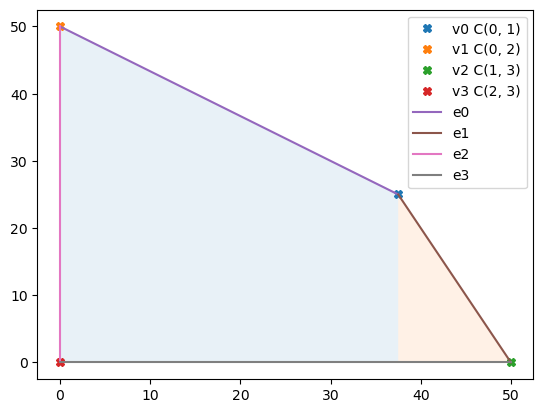

In [4]:
import matplotlib.pyplot as plt
vertices = np.array(vertices)
ymin = np.min(vertices[:,1])
for i in range(vertices.shape[0]):
    x, y = vertices[i,0], vertices[i,1]
    plt.plot(x, y, 'X', label=f"v{i} C{actives[i]}")
for i,edge in enumerate(edges):
    x,y = vertices[edge,0], vertices[edge,1]
    plt.plot(x, y, '-', label=f"e{i}")
    plt.fill_between(x, ymin, y, alpha=0.1)
plt.legend()
plt.show()
